In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization,Conv2D, GlobalAveragePooling1D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Thesis Slide/Datasets /Bangla Online Comments Dataset.csv', sep = ',', encoding = 'utf-8-sig')

In [4]:
data

,comment,Category,Gender,comment react number,label
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully
4,পটকা মাছ,Politician,Male,0.0,troll
...,...,...,...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",Social,Male,0.0,not bully
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,Social,Male,1.0,not bully
43998,হিরো ভাই তুমি এগিয়ে য়াও,Social,Male,0.0,not bully
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,Actor,Female,1.0,not bully


In [5]:
vocab_size = 19469
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 9600


In [6]:
label = data['label'].values.tolist()
comment = data['comment'].values.tolist()
category = data['Category'].values.tolist()
gender = data['Gender'].values.tolist()
print(label[0])

sexual


In [7]:
#Remove emojis
import re


def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               u"\u09E6-\u09EF"#banglanumerical code
                               u"\u0030-\u0039"#englishnumercal code
                               u"\u0041-\u005A"#uppercaseenglish alphabet
                               u"\u0061-\u007A"#lowercaseenglish alphabet
                               u"\u2019"
                               u"\u2018"
                               u"\u201C"
                               u"\u201D"
                               u"\u201E"
                               u"\u201F"

                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

data['new']=data['comment'].apply(remove_emoji)

In [8]:
data

,comment,Category,Gender,comment react number,label,new
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully,"অরে বাবা, এই টা কোন পাগল????"
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully,ক্যাপ্টেন অফ বাংলাদেশ
4,পটকা মাছ,Politician,Male,0.0,troll,পটকা মাছ
...,...,...,...,...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",Social,Male,0.0,not bully,"হিরো আলম,, এগিয়ে যাও"
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,Social,Male,1.0,not bully,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...
43998,হিরো ভাই তুমি এগিয়ে য়াও,Social,Male,0.0,not bully,হিরো ভাই তুমি এগিয়ে য়াও
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,Actor,Female,1.0,not bully,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি


In [9]:
#Stopword
sw = pd.read_csv("/content/drive/MyDrive/Thesis Slide/Datasets /stopwords-bn.csv")
sw.columns = ['Words']
sw.head()
sw = sw['Words']
sw.shape

(397,)

In [10]:
stop_words = ['এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা',
       'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়',
       'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন',
       'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার',
       'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে',
       'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর',
       'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা',
       'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের',
       'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি',
       'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য','দেখাচ্ছে','এইসব','একই','চায়','দিয়ে','অথচ','নিয়ে','বাকি','কিন্তু','এদের','অনেক','পারেনা','দেখান' ,'এক' ,'হয়ে','করছে ','ছাড়া','তুই','তোর','তুমিও','দেয়া ','থেকে','ওয়া','নিজার','ছিঃ','কিছু','থাকে','তুর','তো','তরফ','দিয়েছে','রেখে', 'গেছে ','তে',
      'আপনারা','অর','একটু','আপনাদেরকে','একজন''দেয়া','আপনারটা','আপনাকে','মত','আপনিও','আপনিই','আনা','হয়েছে','আজকে','তোরে','আজও','আছোস','আছি','আচ্ছা','আজকে','আছিলি','আছিস','আছেন','আগেও','আমরাও','আমিও','আরে','আরেক','আরেকজনকে','করছি','আসেন','ইউ','ইকটু','ইয়ে','ইয়েস']
for i in range(sw.shape[0]):
    stop_words.append(sw[i])
print(type(stop_words))
print(len(stop_words))
print(stop_words)

data['new']=data['new'].apply(lambda x: [item for item in x if item not in stop_words])

<class 'list'>
580
['এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা', 'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়', 'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন', 'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার', 'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে', 'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর', 'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা', 'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের', 'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি', 'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য', 'দেখাচ্ছে', 'এইসব', 'একই', 'চায়', 'দি

In [11]:
data["joint"]= data["new"].str.join(" ")

In [12]:
#Remove punctuations
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
# Apply to the DF series

#data['comment_text'] = data['comment_text'].str.replace('“”‘’','')
#data['comment_text'] = data['comment_text'].str.replace('’‘“”,'')
data['comment'] = data['comment'].str.replace('।','')

data['comment'] = data['comment'].apply(remove_punctuations)

In [13]:
data['comment'].head(40000)

0        ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...
1         ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন
2                                  অরে বাবা এই টা কোন পাগল
3                                    ক্যাপ্টেন অফ বাংলাদেশ
4                                                 পটকা মাছ
                               ...                        
39995                   হিরু আলমকে সাহসিকতার জন্য ধন্যবাদ৷
39996                                হিরো আলম ভাই কেমন আছো
39997                                    এত গসাগসির কি আছে
39998    তাহার গরতে আমার চা ঢালার খুব ইচ্ছা একবার যদি প...
39999      একজন মুসলমান হয়ে এক হিন্দু মানুষ কে বিবাহ করলেন
Name: comment, Length: 40000, dtype: object

In [14]:
data['comment'] = data['comment'].str.replace('৷','')
data['comment'] = data['comment'].str.replace('\n','')

In [15]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [16]:
label2D = pd.get_dummies(data[['label']])
data = encode_and_bind(data, 'label')
label_not_bully = data['label_not bully'].values.tolist()
label_religious = data['label_religious'].values.tolist()
label_sexual = data['label_sexual'].values.tolist()
label_threat = data['label_threat'].values.tolist()
label_troll = data['label_troll'].values.tolist()

In [17]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(comment)
word_index = tokenizer.word_index
print(word_index)
sequences = tokenizer.texts_to_sequences(comment)
padded = pad_sequences(sequences, padding='post')
print(padded.shape)

{'<OOV>': 1, 'না': 2, 'করে': 3, 'কি': 4, 'আর': 5, 'এই': 6, 'নাস্তিক': 7, 'বিশ্বাস': 8, 'আল্লাহ': 9, 'তো': 10, 'যে': 11, 'তুই': 12, 'কথা': 13, 'আমি': 14, 'কে': 15, 'আপনি': 16, 'ও': 17, 'আপনার': 18, 'তার': 19, 'থেকে': 20, 'একটা': 21, 'জন্য': 22, 'তোর': 23, 'সাফা': 24, 'হিরো': 25, 'আমার': 26, 'সে': 27, 'তুমি': 28, 'কাছে': 29, 'এর': 30, 'ভাই': 31, 'কোন': 32, 'কিছু': 33, 'আলম': 34, 'আছে': 35, 'করতে': 36, 'নাই': 37, 'ভালো': 38, 'যদি': 39, 'ক্ষমা': 40, 'হয়': 41, 'অনেক': 42, 'বলে': 43, 'হবে': 44, 'তোমার': 45, 'এখন': 46, 'তাহলে': 47, 'মানুষ': 48, 'না।': 49, 'মনে': 50, 'দিয়ে': 51, 'করা': 52, 'কবির': 53, 'হয়ে': 54, '।': 55, 'আমরা': 56, 'আল্লাহর': 57, 'করেন': 58, 'এটা': 59, 'সব': 60, 'মাগি': 61, 'ভুল': 62, 'কিন্তু': 63, 'নিয়ে': 64, 'আবার': 65, 'তাই': 66, 'আমাদের': 67, 'আপনাকে': 68, 'এবং': 69, 'সাথে': 70, 'মত': 71, 'তা': 72, 'পরকাল': 73, 'তাকে': 74, 'সুন্দর': 75, 'সবাই': 76, 'কেন': 77, 'কমেন্ট': 78, 'কেউ': 79, 'বাবা': 80, 'করার': 81, 'এ': 82, 'যারা': 83, 'দান': 84, 'দেখে': 85, 'যা': 86, 'খান': 87, 

In [18]:
print(len(label2D))

44001


In [19]:
from sklearn.model_selection import train_test_split
X = comment
Y = label2D

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=15, test_size=0.15)

testing_labels = Y_test
training_labels = Y_train

In [20]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [21]:
Y_train

,label_not bully,label_religious,label_sexual,label_threat,label_troll
9696,1,0,0,0,0
35731,0,0,0,0,1
24500,0,0,1,0,0
9995,0,0,0,0,1
40550,1,0,0,0,0
...,...,...,...,...,...
35483,0,0,1,0,0
39296,1,0,0,0,0
2693,0,0,1,0,0
8076,0,0,0,0,1


In [22]:
X[12140]

'কলিজার ভাইটি'

In [23]:
import numpy as np
training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
training_labels = np.array(training_labels)


In [24]:
type(label2D)
#testing_labels = label2D[training_size:]
#training_labels = label2D[0:training_size]
print(testing_labels.shape)
print(training_labels.shape)
# training_labels[0].shape

print(label2D.shape)

(6601, 5)
(37400, 5)
(44001, 5)


In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.LSTM(100, dropout=0.2,return_sequences=True,  recurrent_dropout=0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

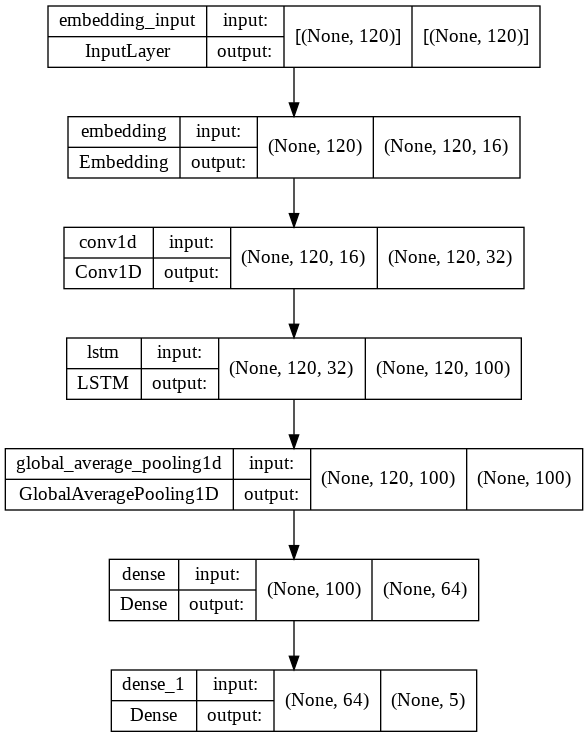

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model2.png')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           311504    
                                                                 
 conv1d (Conv1D)             (None, 120, 32)           1568      
                                                                 
 lstm (LSTM)                 (None, 120, 100)          53200     
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                        

In [28]:
print(training_padded.shape)
print(training_labels.shape)
print(testing_padded.shape)
print(testing_labels.shape)
num_epochs = 15
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels),
                   callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15), #stop training if accuracy doesn't improve in next 3 epoch
    ])

(37400, 120)
(37400, 5)
(6601, 120)
(6601, 5)
Epoch 1/15
1169/1169 [==============================] - 288s 243ms/step - loss: 1.2420 - accuracy: 0.4624 - val_loss: 0.9795 - val_accuracy: 0.6204
Epoch 2/15
1169/1169 [==============================] - 285s 244ms/step - loss: 0.8699 - accuracy: 0.6856 - val_loss: 0.8238 - val_accuracy: 0.7167
Epoch 3/15
1169/1169 [==============================] - 282s 241ms/step - loss: 0.7512 - accuracy: 0.7441 - val_loss: 0.7601 - val_accuracy: 0.7385
Epoch 4/15
1169/1169 [==============================] - 283s 242ms/step - loss: 0.6952 - accuracy: 0.7663 - val_loss: 0.7249 - val_accuracy: 0.7543
Epoch 5/15
1169/1169 [==============================] - 283s 242ms/step - loss: 0.6562 - accuracy: 0.7817 - val_loss: 0.7055 - val_accuracy: 0.7597
Epoch 6/15
1169/1169 [==============================] - 280s 240ms/step - loss: 0.6136 - accuracy: 0.7967 - val_loss: 0.6976 - val_accuracy: 0.7626
Epoch 7/15
1169/1169 [==============================] - 281s 240ms

In [29]:
print('commented')

commented


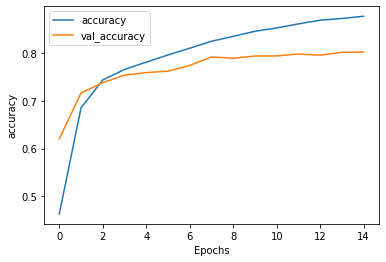

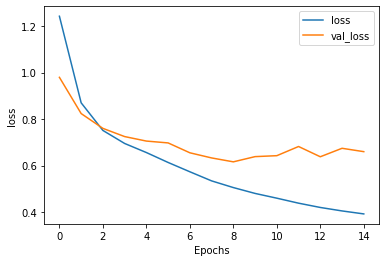

In [30]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [31]:
sentence = ['চেহারা দেখলে বমি আসে']    
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

pred=model.predict(padded)[0]
print(pred)
print('Not Bully : '+str(pred[0]))
print('Religious : '+str(pred[1]))
print('Sexual : '+str(pred[2]))
print('Troll : '+str(pred[4]))
print('Threat : '+str(pred[3])) 

[0.01727116 0.00554956 0.02700952 0.00205077 0.948119  ]
Not Bully : 0.017271165
Religious : 0.00554956
Sexual : 0.027009524
Troll : 0.948119
Threat : 0.0020507697


In [32]:
predictions = model.predict(testing_padded)
predictions = np.argmax(predictions, axis=1)

In [33]:
testing_labels=np.argmax(testing_labels, axis=1)

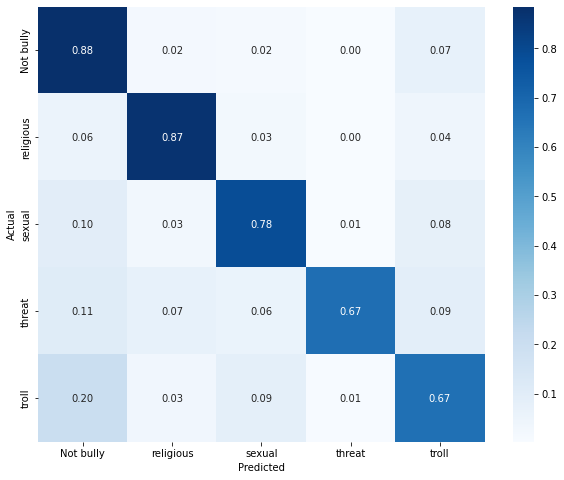

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
# print(testing_labels)
cm = confusion_matrix(testing_labels,predictions)
cm_plot_labels = ['Not bully', 'religious','sexual','threat','troll']
#plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=cm_plot_labels, yticklabels=cm_plot_labels, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(testing_labels,predictions))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      2357
           1       0.85      0.87      0.86      1084
           2       0.83      0.78      0.81      1389
           3       0.85      0.67      0.75       252
           4       0.74      0.67      0.70      1519

    accuracy                           0.80      6601
   macro avg       0.81      0.78      0.79      6601
weighted avg       0.80      0.80      0.80      6601



In [36]:
#from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [37]:
#print(f1_score(testing_labels, predictions, average="macro"))
#print(precision_score(testing_labels, predictions, average="macro"))
#print(recall_score(testing_labels, predictions, average="macro"))  

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

testy = testing_labels
yhat_classes = predictions
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes,average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes,average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes,average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.802757
Precision: 0.802757
Recall: 0.802757
F1 score: 0.791576


In [39]:
Cyberbully_data = pd.read_csv('/content/drive/MyDrive/Thesis Slide/Datasets /Bangla Online Comments Dataset.csv', sep = ',', encoding = 'utf-8-sig')
comments = Cyberbully_data['comment'].values.tolist()

In [40]:
comments[2]

'অরে বাবা, এই টা কোন পাগল????'

In [42]:
sentence = ['অই বেশ্যার কথাগুলো শুনলেই বুঝা যায় কি চমৎকার ডায়লগ সাজিয়েছে। পশুর বাচ্চারা।কিভাবে সংলাপ গুলো বানিয়েছে। মহিলার বাড়িতে একবার গেছি আর কোনো দিন যাবনা বিশ্বাস কর।... অভিশপ্ত নাস্তিকরা মনে করে ওদের অপকর্ম মানুষ বুঝবে না। মানুষ কি ওদের মত বলদ চোদা। অই বেশ্যা কন্ঠে কতরকম ভাবে ডায়ালগ দিয়েছে মনের মাধুরী মিশিয়ে আর মাওলানা সাঈদীর কন্ঠ ডাবিং করে জুড়ে দিয়েছে। কয়দিন করবে এসব? শেষ রক্ষা হবে তো?']
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
pred=model.predict(padded)[0]
top=np.argsort(pred)[-1]
print(label2D.columns[top].replace('label_',""))
print(pred)
print('Not Bully : '+str(pred[0]))
print('Religious : '+str(pred[1]))
print('Sexual : '+str(pred[2]))
print('Troll : '+str(pred[4]))
print('Threat : '+str(pred[3])) 

sexual
[0.0237201  0.05505284 0.81497115 0.00238369 0.10387211]
Not Bully : 0.023720104
Religious : 0.05505284
Sexual : 0.81497115
Troll : 0.103872105
Threat : 0.002383694
